# Logistic Regression with a Kaggle Dataset 

Up until now, we've been working with mock data, but in this chapter, we'll actually be looking at a real dataset which can be found on Kaggle. The dataset we'll be using is the Pima Indians Diabetes dataset. We won't actually be discussing the dataset in detail, but if you wish, you can read more about it here: https://www.kaggle.com/uciml/pima-indians-diabetes-database . I have the dataset already placed in the GitHub repo for this lesson, allowing for easy access. It allows us to not spend too much time importing the data.

Let's start coding! The url to the dataset can be found in the code cell where we call pd.read_csv. We're going to import the csv file using Pandas. Pandas is a famous data science library used to hold data and analyze data. It holds the data in what is known as a dataframe. We're not going to dwell much more than that on Pandas, but if you wish to learn more about it, you can read further on their website: https://pandas.pydata.org/ . Along with Pandas, we'll also be importing PyTorch and Matplotlib.

In [2]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

## 4.1 Diabetes Dataset

The code cell below shows how to import the dataset using Pandas. It's very straightforward.

In [5]:
df = pd.read_csv(r'https://raw.githubusercontent.com/a-coders-guide-to-ai/a-coders-guide-to-neural-networks/master/data/diabetes.csv')

We imported the data into the variable df. Let's take a peak at how it looks. Calling the head function allows us to see the first 5 rows of the dataset.

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Peaking at the first 5 rows of our dataset, we see that we have 9 columns. Before we continue, I want to let you know that "Outcome" is our target variable (i.e. the column we're going to try and predict) and the rest of the columns will be our features (i.e. the columns we're going to use to predict our target). We're going to initially make our predictions using logistic regression and then try again using neural networks.

You're probably thinking that we just spent the last 3 chapters fitting lines to points on a graph and now we're talking about predicting if someone has diabetes or not. How does that even make sense? In the previous chapters, our data had 2 coordinates to them - an X coordinate and a Y coordinate. Given the X coordinate, we were fitting the lines to pass through our Y coordinates. Our lines fit really well through the points. In fact, they fit so well that if we got rid of the points, we could figure out where the points would be, just by seeing the Y value for our fitted line. That's exactly what we're trying to accomplish in this chapter. Instead of just an X and Y coordinate, we have X, Y and 7 other coordinates. The Y coordinate is our target and the other coordinates are our features. That's the only difference. Up until now, we only had 2D graphs (1st dimension being X and the 2nd dimension being Y), but now, we have an 8D graph. Due to human limitations, we can't visualize 8 dimensions, but that's OK. Our loss functions are here to help us. Our loss functions are our tools to figure out how well our line is fitting the points on the graph, without having the need to look at the actual line on a graph.

That may have been a lot to take in, so maybe it's a good idea to look at a few diagrams. Let's take a look at a diagram which we saw back in chapter 2. Below, you'll find the computation graph for logistic regression.

![logistic%20regression.png](images/logistic%20regression.png?raw=true)

The diagram above is the same one we looked at in chapter 2. If you need a refresher, just refer back to chapter 2.

The diagram below is the simplified version of the diagram above. You'll see that the 2 middle circles (the linear and logistic equations) are combined into 1 circle. The circle encompasses both equations, in the form of 1 equation and is referred to as a neuron.

![logistic%20regression%20simplified.png](images/logistic%20regression%20simplified.png?raw=true)

The diagram below is the graph which represents how we're going to perform our logistic regression task in this chapter. The graph is more or less the same in terms of the equations. We have 1 neuron and our loss function will remain the BCE. The only difference is, instead of 2 inputs (i.e. X and 1), we now have 9 inputs (i.e. all the features of the dataset and 1).

I hope it's clear on how we're going to apply logistic regression to the diabetes dataset to make our predictions.

<img src="images/logistic%20regression%20diabetes.png?raw=true"  width="600" height="600">

## 4.2 Matrix Multiplication

Didn't we already go over matrix multiplication in chapter 1? Yes, we did, sorta. We went over it for when there's only 1 feature, but let's go over some neat tricks on how we can make it work for us when there's multiple features. 

In [4]:
weights_E = torch.tensor([2,3,4])
X_E = torch.tensor([[9,8,7], [4,5,6]])

Above, we just made some temporary variables. We currently don't have a bias, but that's not a problem. Let me show you something cool. 

In [5]:
print(torch.sum(weights_E*X_E, axis=1))
print(weights_E@X_E.T)

tensor([70, 47])
tensor([70, 47])


What just happened there? I just showed you 2 lines that gave the exact same output. Before I go over why that's important, let me cover this torch.sum on axis=1 bit. 

Remember in the chapters previous to this, we only did weights*X. We didn't sum them up. Why are we summing it up now? Let's take a look at the shape of our X in this example.

In [6]:
X_E.shape

torch.Size([2, 3])

It says torch.Size([2, 3]). That means that our X has 2 rows and 3 columns. The 3 columns (i.e. 3 features) is the new part. Let's compare the summed equation to the equation we've been using before this chapter.

In [7]:
print(weights_E*X_E)
print(torch.sum(weights_E*X_E, axis=1))

tensor([[18, 24, 28],
        [ 8, 15, 24]])
tensor([70, 47])


You see that our summed equation returns 1 row with 2 columns, and our non-summed returns 2 rows and 3 columns. Instead of explaining with words, let's do our equations manually...

Just to restate our variables<br>
weights_E: [2,3,4]<br>
X_E: [[9,8,7], [4,5,6]]<br><br>

Row 1:<br>
2(9) + 3(8) + 4(7)<br>
=18 + 24 + 28<br>
=70

Row 2:<br>
2(4) + 3(5) + 4(6)<br>
=8 + 15 + 24<br>
=47

We just had our equations written in 3 lines. When we don't sum the multiplication, then we get stuck at line 2, instead of getting to our final answer, which is line 3. The reason we didn't have to do this until this chapter is because there was only 1 column in our X before this. That meant that there weren't multiple columns to add. Our equation would give us the final answer without having to sum.

Now, onto the part of the code where we replaced "*" with "@". Doing the replacement is special to PyTorch. It allowed us to skip the summation step, allowing our equation to look cleaner and perform multiple steps at once!

There's one more part you probably noticed. Instead of using X_E, we used X_E.T. Why? Let's try it without the ".T"

In [8]:
weights_E@X_E

RuntimeError: size mismatch, m1: [1 x 3], m2: [2 x 3] at /opt/conda/conda-bld/pytorch_1587428190859/work/aten/src/TH/generic/THTensorMath.cpp:41

That code unfortunately gave us an error. The main thing I wish to direct you to is the part of the error which states "size mismatch, m1: [1 x 3], m2: [2 x 3]". Just to cover it quickly, in linear algebra, when we multiply 2 matrices, the amount of columns of the matrix on the left, needs to be the exact same value as the amount of rows of the matrix on the right. That means, in order for us to be able to successfully compute this equation, the amount of columns of the matrix on the left (i.e. 3) needs to either change to a 2, or the amount of rows of the matrix on the right (i.e. 2) needs to change to a 3.

<img src="images/col%20by%20row%20comparison.png?raw=true"  width="300" height="300">

The question you must be asking is, "how do we do that?" Simple. The answer is that we turn the first row into the first column, and the second row into the second column, etc. That changing columns into rows and vice versa is called transpose, hence the "T" in ".T".

Which matrix do we transpose? If we do the one on the left, then we change it from [1 x 3] to [3 x 1]. That doesn't really help us, because the amount of columns of the matrix on the left still doesn't match up with the amount of rows of the matrix on the right. If we transpose the matrix on the right, we go from [2 x 3] to [3 x 2]. That works perfectly! Our amount of columns of the matrix on the left is now equal to the amount of rows of the matrix on the right, and now, we can perform our equation, without the errors.

Let's run our equation again, now that we just covered matrix multiplication for multiple features.

In [9]:
weights_E@X_E.T

tensor([70, 47])

## 4.3 Vectorization

Before we apply logistic regression to our dataset, we're finally going to go over why I keep adding "1" to all of our graphs. We haven't added any 1s to any of our datasets, so why do I keep putting it there in our graphs? Before I explain, let's quickly go back to our equation of a line and some simple rules of multiplication.

Our equation of a line was defined as y = slope * X + bias, right? Makes sense so far. Now, what if I showed you the following equation, <br>
y = slope * X + bias * 1 . It's mathematically the same, because anything multiplied by 1 is itself. If it's the same, then why do I add a 1 to it? It seems better to just take the simpler equation.

Let's go over some code to make better sense of this.

In [10]:
bias_E = torch.tensor([5])

I just made a rank 1 tensor by the name of bias_E. It contains only 1 number within it. Let's print out our linear equation below (with and without the 1).

In [11]:
print(weights_E@X_E.T + bias_E)
print(weights_E@X_E.T + bias_E*1)

tensor([75, 52])
tensor([75, 52])


No surprise there. It's the exact same result when multiplying with and without the 1.

Now, we're going to do something a little different. We're going to create 2 new variables using the variables we already have. The tensor bias_E is concatenated to weights_E and a tensor of 1s is concatenated to the tensor X_E. Let's take a look.

In [12]:
weights_E_new = torch.cat((weights_E, bias_E), dim=0)
X_E_new = torch.cat((X_E, torch.ones(2, 1, dtype=int)), dim=1)

print('weights_E_new:')
print(weights_E_new)
print()
print('X_E_new:')
print(X_E_new)

weights_E_new:
tensor([2, 3, 4, 5])

X_E_new:
tensor([[9, 8, 7, 1],
        [4, 5, 6, 1]])


There's nothing extraordinary done to those variables, but this is where the magic of math happens.

In [13]:
print(weights_E@X_E.T + bias_E*1)
print(weights_E_new@X_E_new.T)

tensor([75, 52])
tensor([75, 52])


We were able to get the same result, but without adding the bias. How? Let me show you in math...

Our equations are the following (with the bias):<br>
Row 1:<br>
2(9) + 3(8) + 4(7) + 5(1)<br>
<br>
Row 2:<br>
2(4) + 3(5) + 4(6) + 5(1)<br>

When you look at it like that, the bias just looks like it can be part of the weights tensor, and the 1, which is multiplied in each equation, looks like they can be added to the X tensor. That's exactly what the concatenation did. That's the magic of math! 

## 4.4 Predicting with Logistic Regression

Just before we run logistic regression, let's split our dataset into 2 parts. 1 part holding the features and the other holding the target. Thereafter, we'll turn those into tensors.

In [14]:
X = df[df.columns[:-1]]
y = df['Outcome']

X = torch.tensor(X.values)
y = torch.tensor(y.values)

X = torch.cat((X, torch.ones(X.shape[0], dtype=float).reshape(-1,1)), dim=1)

Going over the code, X = df[df.columns[:-1]] takes all the columns of the dataset, except for the last column (i.e. Outcome) and assigns it to X, while y = df['Outcome'] only takes the Outcome column and assigns it to y.

The torch.ones function is being used exactly the same way, except this time, we're adding a 1 for every row that exists in X (X.shape[0] returns the amount of rows present in X). Don't worry about the reshape for now. We'll return to it at the end of this chapter.

Finally, time for logistic regression. Let's stop writing words and start writing code. Time to see logistic regression in  action!

In [15]:
def log_loss(y, y_pred): ##log loss error (binary cross entropy)
  return -torch.sum((y*torch.log(y_pred) + (1-y)*torch.log(1-y_pred)))/y.shape[0]

def sigmoid(linear):
    return 1/(1+torch.exp(-linear))

epoch_loss = []

weights = torch.zeros(9, dtype=float, requires_grad=True)
learning_rate = 1e-4
n = X.shape[0]

for epoch in range(8000+1): 
    linear = weights.reshape(1,-1)@X.T ##one equation for all
    y_pred =  sigmoid(linear) ##logistic
    loss = log_loss(y, y_pred)
    epoch_loss.append(loss.item())

    ###backpropagation###
    loss.backward()

    ###step###
    with torch.no_grad():
        weights -= learning_rate * weights.grad

    weights.grad.zero_()

    if(epoch % 1000 == 0):
        acc = torch.sum(((y_pred>=0.5)+0 == y)+0).item()/y.shape[0]
        print('epoch: {0} - loss: {1:.5f}; acc: {2:.3f}'.format(epoch, epoch_loss[-1], acc))

epoch: 0 - loss: 0.69315; acc: 0.349
epoch: 1000 - loss: 0.61885; acc: 0.676
epoch: 2000 - loss: 0.61605; acc: 0.685
epoch: 3000 - loss: 0.61403; acc: 0.686
epoch: 4000 - loss: 0.61253; acc: 0.689
epoch: 5000 - loss: 0.61142; acc: 0.694
epoch: 6000 - loss: 0.61057; acc: 0.699
epoch: 7000 - loss: 0.60992; acc: 0.702
epoch: 8000 - loss: 0.60942; acc: 0.702


Awesome! We did it! One of the things you probably realized is that we're no longer using graphs, rather, we're printing out our loss. We even threw in the accuracy. Accuracy isn't our loss function, but it's a good metric. The reason for using accuracy is because looking at just the BCE isn't really that interpretable.

Looking at the print lines, we see that we achieved 70% accuracy on our dataset. The kind of results we achieved is probably not good enough to save lives, so maybe it's not something to throw into production, but considering we did absolutely nothing to our data and we have absolutely no medical understanding of diabetes, we seem to be able to get our machine learning model to be able to somewhat have an understanding of how the data works. That's super powerful when you think about it. Let's go over some of the code, because you probably realized a few differences from the last chapter.

Going from the top, the first thing you immediately see is that I made a sigmoid function. It's so the code is more readable. The other part that stands out is weights.reshape(1,-1). That reshape function turns our weights tensor from a tensor of rank 1, to a tensor of rank 2. That step is mandatory in order to do the matrix multiplication with our X tensor (i.e. the actual data). The 1 provided to the reshape function tells it how many rows we want it to have and the -1 tells the function to automatically choose as many columns required to be able to reshape the tensor to only have 1 row (i.e. 9 columns in our case). In essence, for our case, weights.reshape(1,-1) is exactly the same as weights.reshape(1,9). Check the shape out and see for yourself. The reshape function is very important, so make sure you play with it to get a feel of it.

We'll end this chapter with a graph. As we did in the previous chapters, let's look how our loss has changed throughout the epochs.

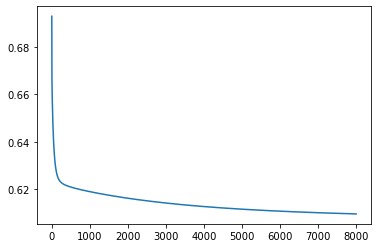

In [16]:
plt.plot(epoch_loss)